In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)

In [3]:
df = pd.read_csv("C:\\Users\\jpadmapratyusha\\Desktop\\AI ACADEMY\\Clustering\\Mall_Customers.csv")

In [4]:
x = df.iloc[:, [3, 4]].values


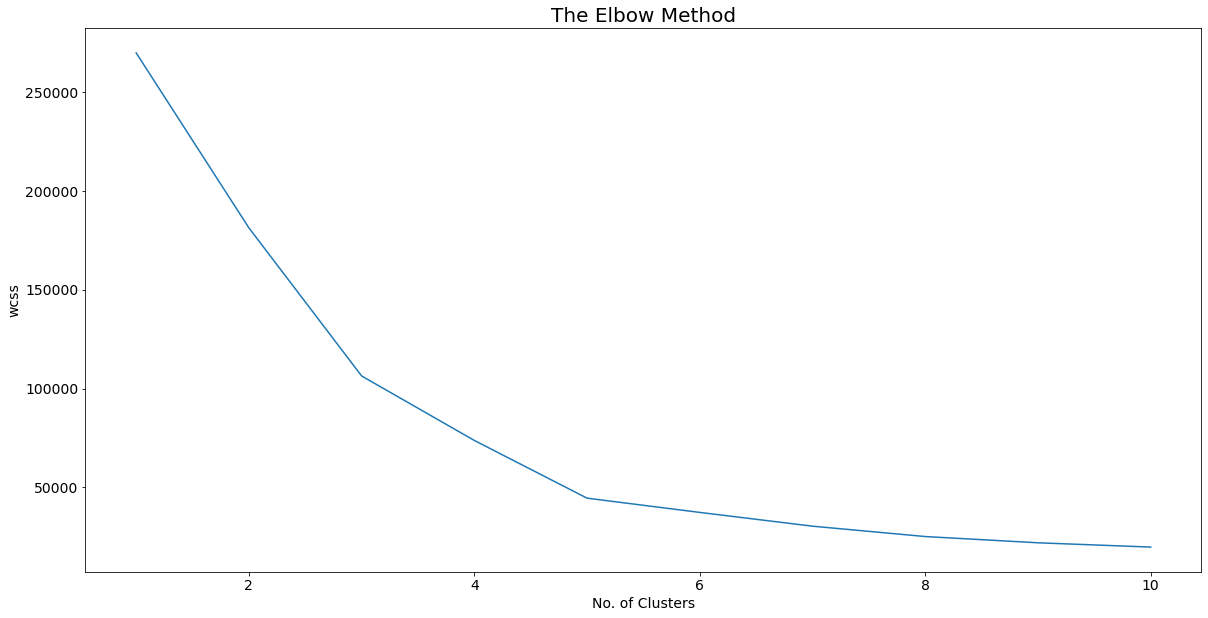

In [7]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize = (20, 10))

wcss = [] #within cluster sum of squares
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
km = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
y_means = km.fit_predict(x)

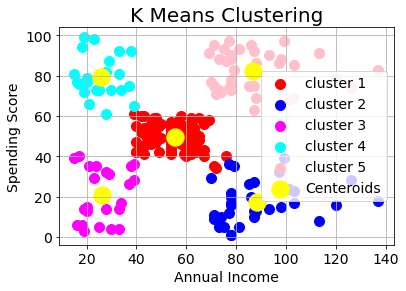

In [19]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'magenta', label = 'cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'pink', label = 'cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 300, c = 'yellow' , label = 'Centeroids')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### SILHOUETTE SCORE:

In [20]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,km.labels_,metric='euclidean')
print("Silhouette score: %.3f"%score)

Silhouette score: 0.554


## Agglomerative

In [45]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean')
y_agmeans = ag.fit_predict(x)

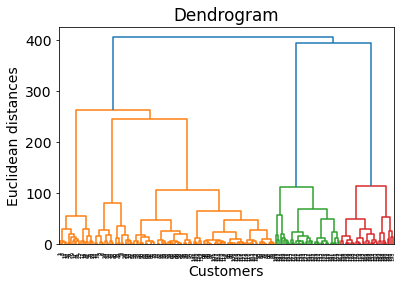

In [46]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,ag.labels_,metric='euclidean')
print("Silhouette score: %.3f"%score)

Silhouette score: 0.553


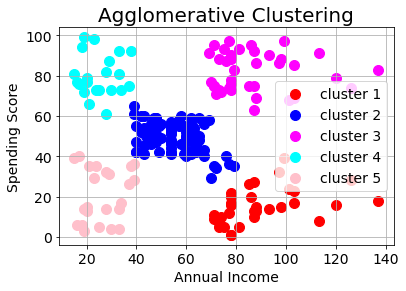

In [39]:
plt.scatter(x[y_agmeans == 0, 0], x[y_agmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(x[y_agmeans == 1, 0], x[y_agmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(x[y_agmeans == 2, 0], x[y_agmeans == 2, 1], s = 100, c = 'magenta', label = 'cluster 3')
plt.scatter(x[y_agmeans == 3, 0], x[y_agmeans == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(x[y_agmeans == 4, 0], x[y_agmeans == 4, 1], s = 100, c = 'pink', label = 'cluster 5')

plt.title('Agglomerative Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()